# Random Forest

Decision trees can often get training errors close to zero because we can grow very large trees to partition the feature
space into tiny regions with 1 or just a few observations/samples; trees are very accurate on the training set and are not biased (not always systematically under- predicting or always over-predicting)
The downside is that decision trees overfit like mad; or, using stats nerd terminology, decision trees have high variance and don’t generalize well
• High variance implies model parameters (tree structure) vary a lot if we tweak the training data just a little bit

### How can we increase generality 
Goal: keep the high accuracy, but increase the generality
• Recall: simplifying models can increase generality at cost of some error

• So, let's weaken our decision tree model but in a way that makes predictions noisy not biased

• That means the model's prediction might be too high for one test case and too low in another

• But, the model will not always be too low or always too high, which would be biased 

• The expected value of weakened model's prediction is same as full strength model

• To compensate for the noise and claw back some accuracy, make an ensemble of such weakened trees: the ensemble is accurate on average

• Ensemble predictions are the aggregate of the trees' predictions (average prediction or majority vote)


# Ensembel method 
As an example of an Ensemble method, you can train a group of Decision Tree classifiers, each on a different random subset of the training set.To make predictions, you obtain the predictions of all the individual trees, then predict the class that gets the most votes. Such an ensemble of Decision Trees is called a Random Forest.

### The key idea is that train multiple trees by taking subsamples(rows) and sub features(columns) from the whole training data set and assigning them with replacement(bootstrapping) where some of them are repeated in other trees and get individual predictions from each tree and aggregate the results to get max vote in case of classifiers and mean of the predictors in case of regressors. 
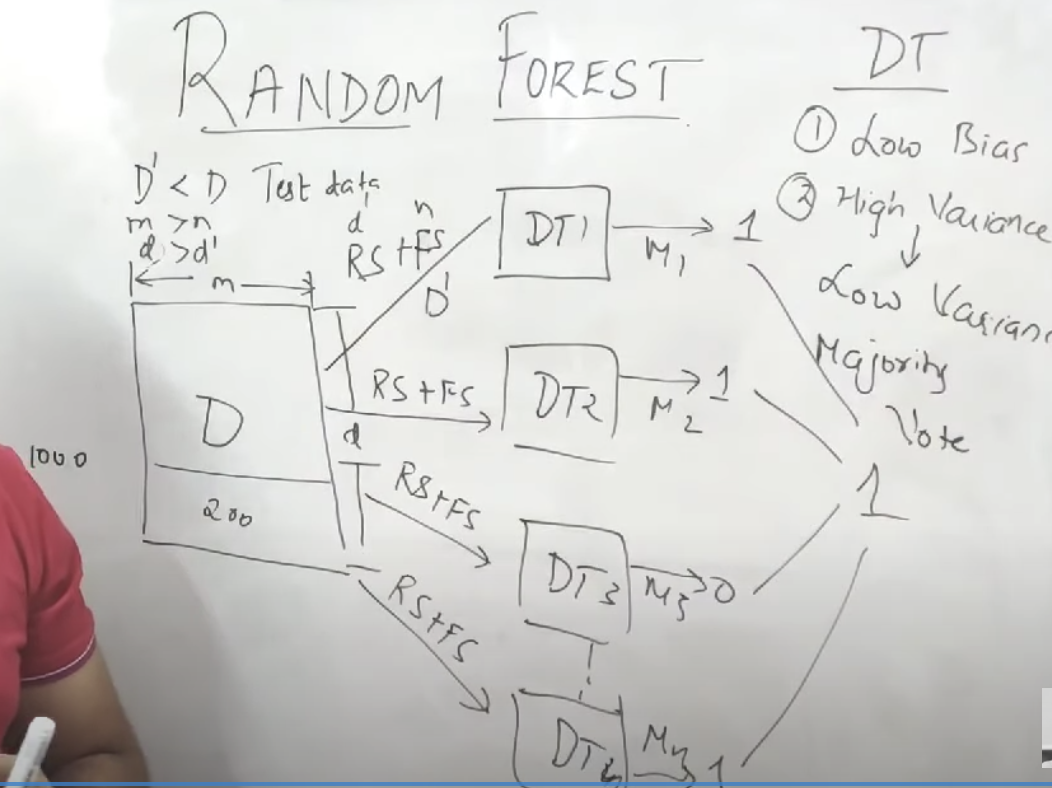

In the above picture, we have a complete tree D, with 1000 samples d, and m features and we make 4 trees Dt1,DT2,Dt3, Dt4 where RS, FS(row samples and row features) are selected let's say 1000 samples for DT-1 and do the same process for Dt-2 ... dt4. While taking the 1000 samples for DT-2 ... DT4 we randomly select the samples from the original 1000 samples and with replacement, this drops about 1/3 of the original samples since they are replaced by the repeated values. This Process is called bootstrapping. 

The randomly selected records from the original set gives me is roughly 63% of the unique original records. So some observations can appear many times in a subset of the data set.

Then finally we take individual predicitions from the four trees above and aggregate them as [1,1,0,1] and take the majority vote in this case 1. 



## What does bagging mean? 

---> Bagging, or bootstrap aggregating, is where we create bagged trees by creating X number of decision trees that are trained on X bootstrapped training sets. The final predicted value is the average value of all our X decision trees. One single decision tree has high variance (tends to overfit), so by bagging or combining many weak learners into strong learners, we are averaging away the variance. It’s a majority vote!

---> Each individual predictor has a higher bias than if it were trained on the original training set, but aggregation reduces both bias and variance. Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

### How do we choose the number of features????
Ans →  Ans →  Until we get the validation error that we like so we've got the number of trees. And we've got the Max features. 
→ Each Tree is given the whole features, at any decision point it chooses a subset and then the next node in the same tree uses a different subset and the next node in the same tree it chooses a different subset, so each tree is given all variables during construction.


### Why does that accuracy improve a lot right at the beginning, when I added trees? And why does it slow down after some point? 

Ans → each tree only sees roughly two thirds of the data. So after I've added in a few more bootstrap trees, the use of the training data(the amount of training data the ensemble has together in the aggregate scene goes up).
→ After you add more trees the ensemble sees most of the training data. And in fact it is always going to be a little bit noisier than the original tree, at least on the training data, however, on validation data it's going to be much better than a single tree. 


### Random forests do not overfit as more trees are at it, why?
Ans → by weakening the trees we increase the generality. By ensemble and aggregating or getting the accuracy back, we are not introducing a bias. By the magic of CLT when we do averaging as we add trees we are tightening the variance/noises of predictions. New trees also balance each other. 



### Brendan says the random forests are relatively robust to Y outliers and X noise ? Perfect Interview 
ANS → Variables, to actually use it right, the more predictive and the less noise, the more it's going to choose it during splitting. Noise Vars are not chosen as splits. y -outliers are shunted to their own leaf during splits, thereby reducing loss function. 


### So why does Bagging help the more the model is unstable? 

Ans → if the  models are  already pretty general and so, if I'm averaging a bunch of things that are very close to each other it's just not going to help much, but this averaging is really squeezing predictions to centroid. And averaging is a really good smoothing operator if there are bounces but if it's already smooth it's not going to help you much.

### Why are RF scale and range insensitive ?
ANS → fundamentally we are looking at every variable independently when we make a choice and we're not doing any math. we're comparing what we're saying is less than or equal. And for the y we are using once we get the clump mean and mode. 


### Why do I like random forests?
Ans → when I prepare data for random forests. I have to deal with missing values, but I don't have to convert categorical variables to dummy variables. 
- Easy to understand, efficient, excellent accuracy, interpretable.
- I also don't have to normalize my variables. I don't have to care about the ranges. Random forest are okay, with some noisy data. What whether it's in the wire, the X if they're noisy and the y that's fine let's jump into a small little region over here won't screw up the rest of the tree. 
- actually be quite fast because remember I can train each tree in parallel they're independent.
 
- they don't require a lot of tuning.


Negative: cannot extrapolate beyond support data


# RF Algorithm 

Classification and regression trees do an excellent job of fitting a model to the training data. Unfortunately, decision trees are a little too good and they overfit like mad, meaning that they do not generalize well to previously-unseen test data. To increase generality, random forests use a collection of decision trees that have been weakened to make them more independent. We trade a bit of accuracy for dramatically improved generality.

A random forest does not feed all data to every decision tree in its collection. Each tree is trained on a bootstrapped version of the original training set. Further, RFs must sometimes forget some of the available features during training. In our case, decision node splitting will be limited to considering a random selection of features of size max_features, a hyper parameter not used in our decision trees. Naturally, both bootstrapping and setting a maximum features per split introduce noise into the predictions of the individual decision trees. But, averaging results of these tree estimators squeezes the noise back down. We get the best of both worlds!

# Bootstrapping
The goal of bootstrapping for random forests is to train a number of decision trees that are as independent and identically distributed as possible by using different but similar training sets. Each tree trains on a slightly different subset of the training data. Bootstrapping, in theory, asks the underlying distribution that generated the data to generate another independent sample. In practice, bootstrapping gets about 2/3 of the X rows, leaving 1/3 "out of bag" (OOB). See sklearn's resample function for a handy way to get a list of indexes to help create a bootstrap sample training set. For example, if I have a numpy array with a list of indexes in idx from X, then X[idx] is a list of rows from 2D matrix X.

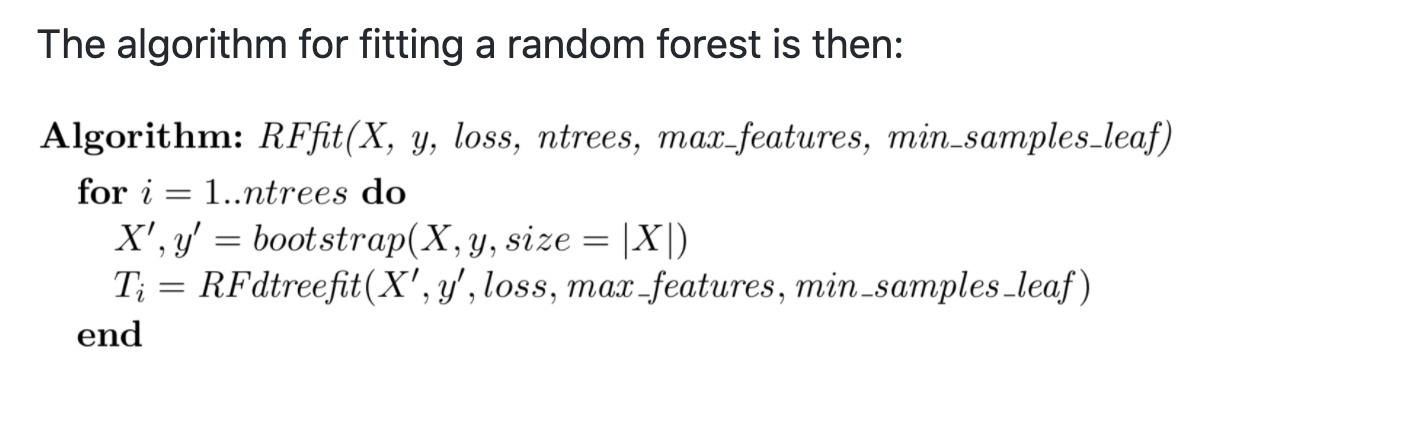

In [250]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from sklearn import tree
from dtreeviz.trees import *


In [251]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.20)



#### Visualize how random the subset of the training data are by applying bootstrap

In [249]:
def bootstrap_example(X, y):
    for i in range(3):
        idx = np.random.choice(X.shape[0], X.shape[0], replace=True)
        n = idx[:5]
        print(y[n])
#     return X[idx], y[idx]
    
bootstrap_example(X_train, y_train)

[0 1 2 1 2]
[0 1 1 0 0]
[1 1 2 2 2]


# Decision Tree for Random Forest. 

For fitting conventional decision trees, bestsplit() exhaustively scans all available features and the feature values looking for the optimal variable/split combination. To reduce overfitting, each split should pick from a random subset of the features; the subset size is the hyper parameter max_features. Function np.random.choice() is useful here to get a list of feature indexes and then X[:, i] gives us the ith column. In my solution, the change is to the outermost loop in find_best_split(): Let's First Write the Decision Tree for Random Forest. 
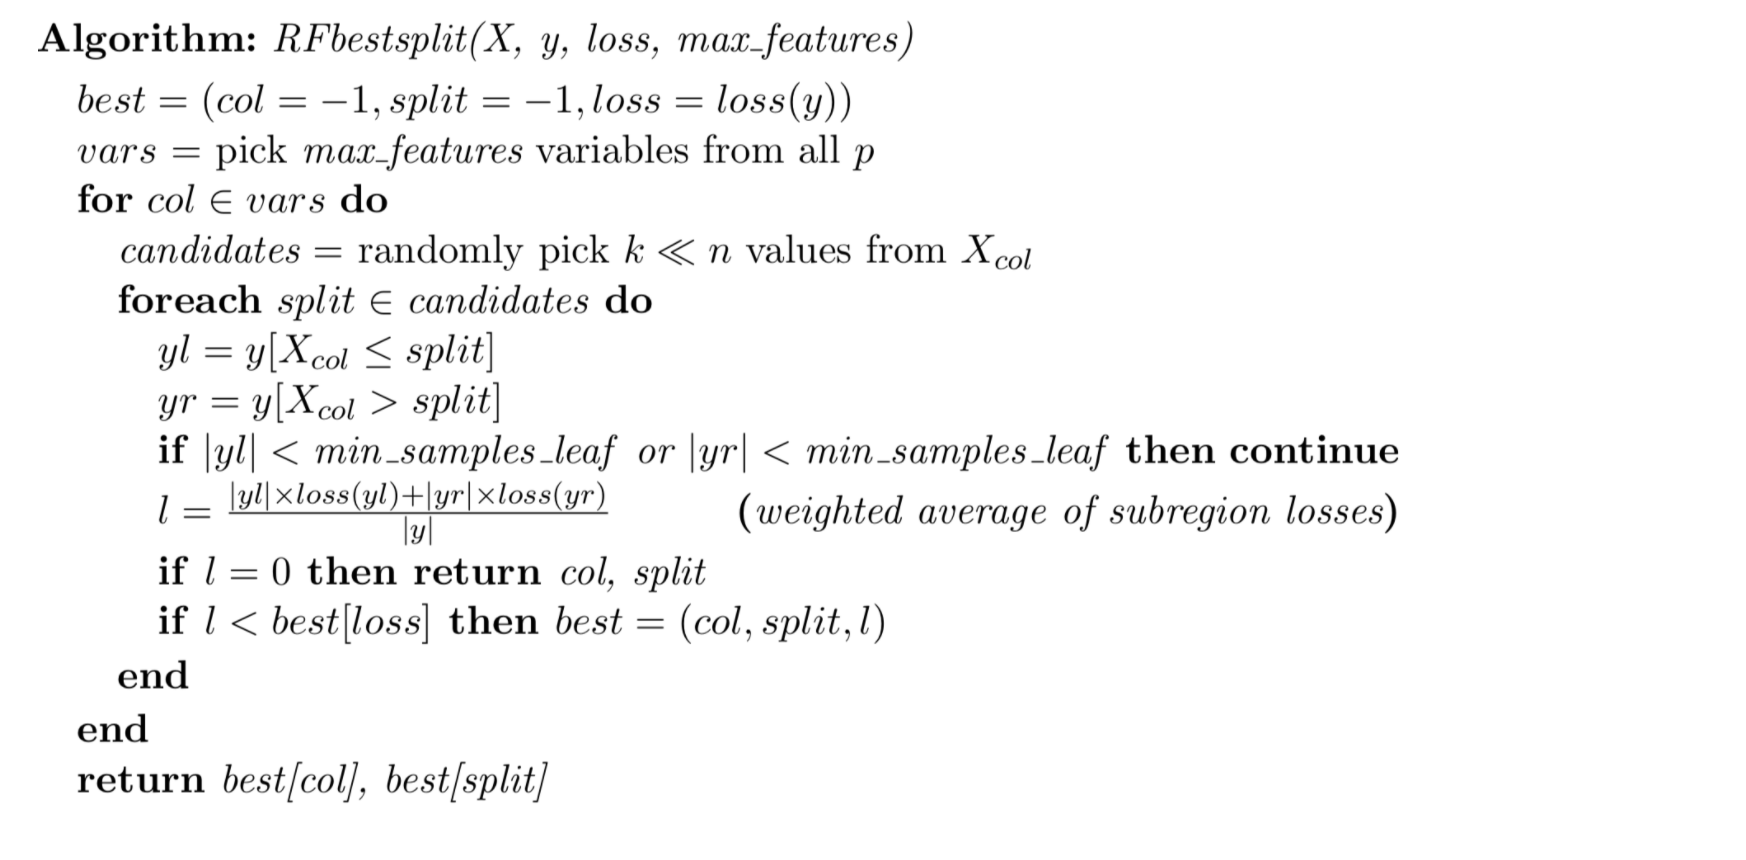

In [252]:
import numpy as np

class DecisionNode:

    def __init__(self, col=None, split=None, lchild=None, rchild=None,*,value=None):
        self.col = col
        self.split = split
        self.lchild = lchild
        self.rchild = rchild
        self.value = value
    def leaf_node(self):
        return self.value is not None

class DecisionTree:

    def __init__(self, min_samples_leaf=1, obj = None, max_features = None):
        self.min_samples_leaf = min_samples_leaf
        self.obj = obj
        self.max_features = max_features

    def fit(self, X, y):
        """
        Create a decision tree fit to (X,y) and save as self.root, the root of
        our decision tree, for either a classifier or regressor.  Leaf nodes for classifiers
        predict the most common class (the mode) and regressors predict the average y
        for samples in that leaf.  
              
        This function is a wrapper around fit_() that just stores the tree in self.root.
        """
        self.root = self.fit_(X, y, self.min_samples_leaf)
        
    
    def fit_(self, X, y, min_samples_leaf):
        """
        Recursively create and return a decision tree fit to (X,y) for
        either a classifier or regressor.  This function should call self.create_leaf(X,y)
        to create the appropriate leaf node, which will invoke either
        RegressionTree621.create_leaf() or ClassifierTree621. create_leaf() depending
        on the type of self.
        
        This function is not part of the class "interface" and is for internal use, but it
        embodies the decision tree fitting algorithm.

        (Make sure to call fit_() not fit() recursively.)
        """
        samples, features = X.shape 

        if samples < self.min_samples_leaf:
            leaf = self.obj.create_leaf(y)
            return DecisionNode(value=leaf)
        
        
        best_col, best_split = self.best_split(X, y, self.max_features)
        if best_col == -1:
            leaf = self.obj.create_leaf(y)
            return DecisionNode(value=leaf)
        lchild = self.fit_(X[X[:, best_col] <= best_split], y[X[:, best_col] <= best_split], self.min_samples_leaf)
        rchild = self.fit_(X[X[:, best_col] > best_split], y[X[:, best_col] > best_split], self.min_samples_leaf)
        return DecisionNode(best_col, best_split, lchild, rchild)

    def best_split(self, X, y, max_features):
        best_gain = -1
        best_col, best_split = -1,-1
        var = np.random.choice(X.shape[1], size= int(X.shape[1] * max_features), replace = True)
 
        for col in var:
            X_column = X[:, col]
            candidates = np.random.choice(X_column, size=11, replace=True)
            # print(candidates)
            candidates = np.unique(candidates)
            thresholds = X_column
            
            for split in candidates:
                yl = y[X[:, col] <= split]
                yr = y[X[:, col] > split]
                loss = self.obj.loss(y)
                if len(yl) < self.min_samples_leaf  or  len(yr) < self.min_samples_leaf:
                    continue
                child_loss = (len(yl) / len(y)) * self.obj.loss(yl) + (len(yr) / len(y)) * self.obj.loss(yr)
                l = loss - child_loss
                if l == 0:
                    return best_col, best_split
                if l > best_gain:
                    best_gain = l
                    best_col = col
                    best_split = split
        
        return best_col, best_split

    def predict(self, X): 
        preds = np.array([self.traverse_tree(x, self.root) for x in X])
        return preds

    def traverse_tree(self, x, node):
#         print(node.col, x[node.col], node.split)
        if node.leaf_node():
            return node.value
        
        if x[node.col] <= node.split:
            return self.traverse_tree(x, node.lchild)
        return self.traverse_tree(x, node.rchild)


# Random Forest Algorithm 

The forest class is built on top of a single decision tree and has the following methods:
1.  __init__() - the constructor, holds hyperparameter values for the number of trees in the forest, minimum samples split, and maximum depth. It will also hold individually trained decision trees once the model is trained.
2. bootstrap_sample(X, y) function applies bootstrap sampling to input features and input target.
3. fit(X, y) function trains the classifier model
4. predict(X) function makes predictions with individual decision trees and then applies majority voting for the final prediction

At the end I will try to explain how the prediction method works piece by piece. 

In [253]:
# Genrate 
def bootstrap_sample(X, y):
    """
    The goal of bootstrapping for random forests is to train a number of decision trees that are as independent and 
    identically distributed as possible by using different but similar training sets. 
    Each tree trains on a slightly different subset of the training data.
    
    :param X: np.array, features
    :param y: np.array, target
    :return: tuple (sample of features, sample of target)

    """
    n_rows, n_cols = X.shape
    # Sample with replacement
    samples = np.random.choice(a=n_rows, size=n_rows, replace=True)
    return X[samples], y[samples]
    


class RandomForest:
    
    def __init__(self, n_estimators=10, oob_score=False):
        self.n_estimators = n_estimators
        self.oob_score = oob_score
        self.oob_score_ = np.nan

    def fit(self, X, y):
        '''
        Trains a Random Forest classifier.
        
        :param X: np.array, features
        :param y: np.array, target
        :return: None
        '''
        self.trees = []
        for _ in range(self.n_estimators):
            # build each of the forest 
            tree = DecisionTree(min_samples_leaf=self.min_samples_leaf, obj= self, max_features = self.max_features)
            # Obtain data sample
            X_, y_ = bootstrap_sample(X, y)
            # Train
            tree.fit(X_, y_)
            # Save the classifier in multiple trees of the forest 
            self.trees.append(tree)
#         if self.oob_score:
#             self.oob_score_ = self.oob_score
  

class RandomForestClassifier621(RandomForest):
    def __init__(self, n_estimators=10, min_samples_leaf=3, max_features=0.3, oob_score=False):
        super().__init__(n_estimators, oob_score=oob_score)
        n_estimators = n_estimators
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []

    def predict(self, X):
        '''
        Predicts class labels for new data instances.
        
        :param X: np.array, new instances to predict
        :return: float, predicted class of the forest 
        '''
        # Make predictions with every tree in the forest
        print(X.shape) # inputshape  (36, 13)
        
        y = []
        for tree in self.trees:       # we have 10 trees and our output shape is (10, 36) 
            preds = tree.predict(X)   # 36 predcted values per tree for total of 10 trees 
            y.append(preds)
        
        # Reshape so we can find the most common value
        # The shape y is (10, 36) but our aim is to take most common values from the 10 trees not from the 
        # 36 predictions 
#         print(np.array(y))
        y = np.swapaxes(a=y, axis1=0, axis2=1)
#         print(y)
        y_pred = [np.bincount(tree_pred).argmax() for tree_pred in y]
        print(np.array(y_pred))
        return np.array(y_pred)

    def loss(self,y):
        _, counts = np.unique(y, return_counts=True)
        n = len(y)
        return 1 - np.sum( (counts / n)**2 )
    
    def create_leaf(self, y):
        return np.bincount(y).argmax()

    def score(self, X_test, y_test):
        "Return the accuracy_score() of y_test vs predictions for each record in X_test"
        y_pred = self.predict(X_test)
    
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy
    

In [254]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.20)

In [255]:
rf = RandomForestClassifier621(n_estimators=10,min_samples_leaf=3, max_features=0.2, oob_score=None)
rf.fit(X_train, y_train)
# rf.score(X_train, y_train)
rf.score(X_test, y_test)


(36, 13)
[0 1 2 1 1 0 2 1 1 1 0 1 0 1 0 0 2 2 0 0 0 2 0 2 0 1 0 1 2 0 1 2 0 2 0 0]


0.9722222222222222

## Random Forest Prediction 

For classification, go through all of the trees, and get the leaves associated with the prediction of a single feature vector. Basically go through all of the trees and make predctions of each instances of the input X. The output will be(trees, predictions per tree).For example for X.shape = (36,13) the shape of output of predictions for 10 trees in a forest is (10, 36) as we can see in the picture.    

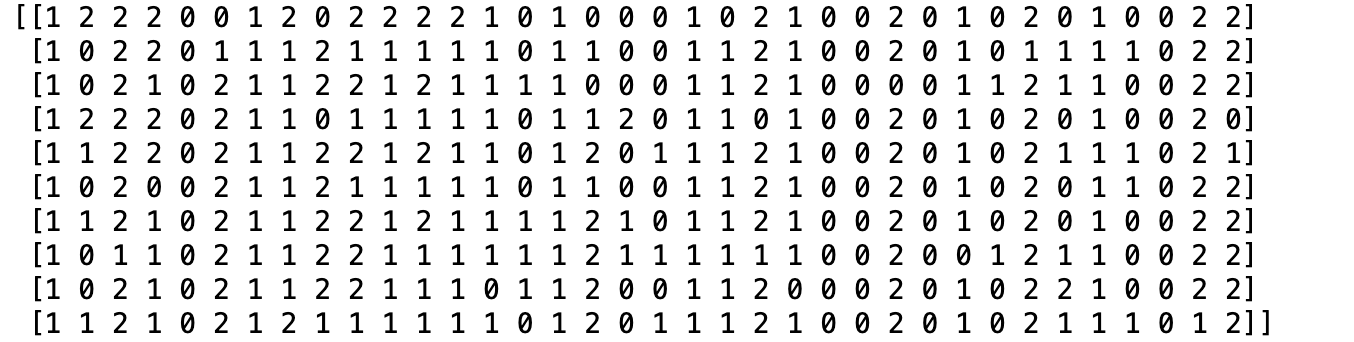
But our aim is to take the majority of a vote from all the trees for each instance of X, so we have to swap our predctions as we can see in the picture so that the shape will be (36, 10). 
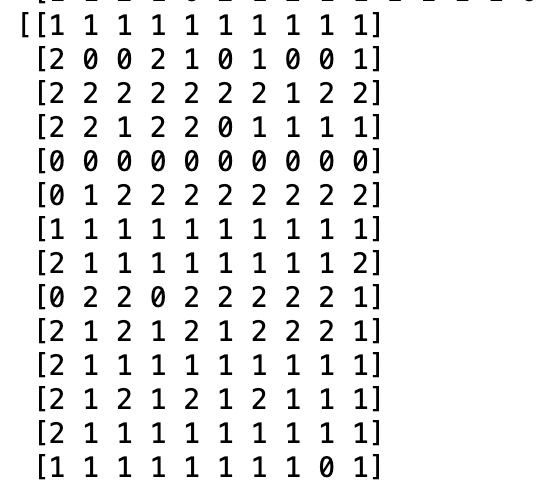
In the picture, the first instance's prediction will be 1 since the majority vote([1 1 1 1 1 1 1 1 1 1] ) in the trees is 1. For the second instance in the trees we have ([2 0 0 2 1 0 1 0 0 1]) and the majority vote will be 0 as we have 5 0's, 3 ones, and 2 twos. We Keep choosing the majority vote from the trees we have for every instances and put them in single array and wil be compared with the True values for accuracy measures. 

The final predictions are 
[2 0 2 1 2 1 1 0 0 1 2 2 1 0 2 0 0 2 1 2 0 2 2 1 1 0 0 2 2 2 0 2 0 0 1 1]

and our true values from the test set are:
[2 0 2 0 0 2 1 1 1 2 1 1 0 0 2 2 1 0 2 2 1 0 1 0 0 1 1 2 2 1 2 2 0 1 0 1]

As we can see almost all of the values are similar suggesting our model is prefectly working with above 90% accuracy. 
